## TP4

Le but de ce TP est de voir en pratique le code de répétition $R_n$ vu en cours sur une image. On verra ensuite comment décoder un cas avec des bits vérificateur de parité.

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, filters

In [2]:
import matplotlib as mpl
try :
    import seaborn as sns

    sns.set()
    sns.set_style("white")
    sns.set_context("poster")
except ImportError:
    print("seaborn makes nice plots easier")

mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 17
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

%matplotlib inline

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

In [3]:
myimRGB = io.imread("calvin_hobbes.png")

In [4]:
from skimage.color import rgb2gray
myimBW = rgb2gray(myimRGB)
print(myimBW.shape)

(449, 540)


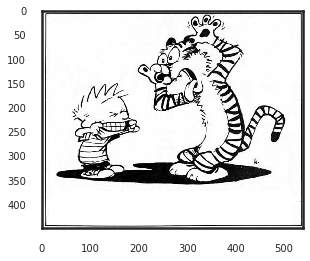

In [5]:
plt.imshow(myimBW, cmap=plt.cm.gray)
plt.show()

In [6]:
# Image binarisée
myimBin = (myimBW >0.5)*1
im = myimBin.reshape(myimBin.shape[0]*myimBin.shape[1])
print(im.shape, 'vs', myimBin.shape)

(242460,) vs (449, 540)


In [7]:
print('sample :', im[:50])
print('shape :', im.shape, 'dtype :', im.dtype)
print('unique :', np.unique(im))

sample : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
shape : (242460,) dtype : int64
unique : [0 1]


Votre travail
  1. Implémenter la fonction **Encode** qui à partir d'une image prépare le message à transmettre
  2. Implémenter la fonction **Transmit**, qui va, à partir un message à transmettre, émuler le canal bruité symmétrique de paramètre $f$
  3. Implémenter la fonction **Decodage**, qui va débruiter à partir du message reçu, reconstitué au mieux le signal envoyé

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [8]:
def Encode(myim, r):
    # TODO
    return None

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [9]:
def Encode(myim, r):
    return np.repeat(myim, r)

In [10]:
# Test
e = Encode(im, 3)
print(e.shape)
print(e[:9])
print(im[:3])

(727380,)
[1 1 1 1 1 1 1 1 1]
[1 1 1]


<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [11]:
def Transmit(myim, f):
    # TODO
    return None

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [12]:
def Transmit(myim, f):
    noise_vector = np.random.random(myim.shape) < f
    res = (myim + noise_vector) % 2
    return res

In [13]:
# Test
t = Transmit(e, 0.1)
print("Fq of wrong bits", np.mean(np.abs(t-e)))

Fq of wrong bits 0.10018834721878522


<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [14]:
def Decodage(ts, r):
    # TODO
    return None    

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [15]:
def Decodage(ts, r):
    msg_size = int(ts.shape[0]/r)
    return ts.reshape(msg_size,r).sum(axis=1) > (r / 2) 
    

```
[111000111001111000111000]

 <---- sum
[[111]
 [000]
 [111]
 [001]
 [111]
 [000]
 [111]
 [000]
 ]

```


<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

In [16]:
dec = Decodage(t, 3)

In [17]:
e1 = Encode(im,1)
t1 = Transmit(e1, 0.1)
d1 = Decodage(t1, 1)

e11 = Encode(im, 11)
t11 = Transmit(e11, 0.1)
d11 = Decodage(t11, 11)

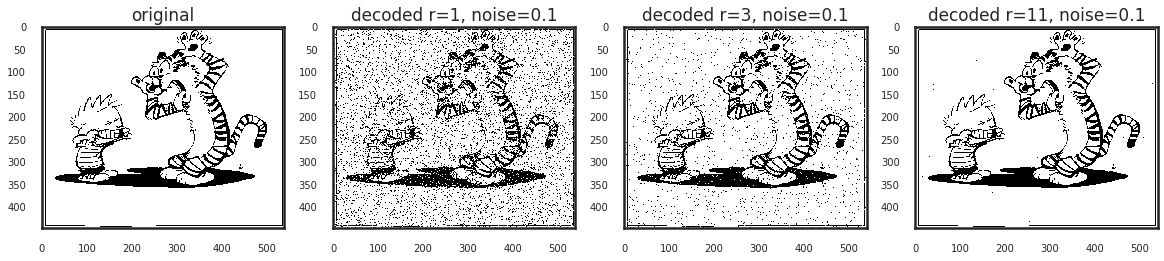

In [18]:
f,ax = plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(myimBin, cmap=plt.cm.gray)
ax[0].set_title('original')

ax[1].imshow(d1.reshape(myimBin.shape), cmap=plt.cm.gray)
ax[1].set_title('decoded r=1, noise=0.1')

ax[2].imshow(dec.reshape(myimBin.shape), cmap=plt.cm.gray)
ax[2].set_title('decoded r=3, noise=0.1')

ax[3].imshow(d11.reshape(myimBin.shape), cmap=plt.cm.gray)
ax[3].set_title('decoded r=11, noise=0.1')
plt.show()

Maintenant, 

  1. Calculer le taux d'erreur théorique pour chaque code $R_N$ à l'aide de la fonction **ErrorRate**
  2. Vous tracerez le taux d'erreur en fonction de la longueur (Rate) du code pour $n$ allant de 1 à 60.

In [19]:
import scipy.special

In [20]:
try :
    sns.set_style("whitegrid")
except NameError:
    pass

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

Calculer le taux d'erreur théorique pour chaque code $R_N$ à l'aide de la fonction **ErrorRate**

In [21]:
# compute rate of error
def ErrorRate(r, f):
    # TODO
    return None

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [22]:
# compute rate of error
def ErrorRate(r, f):
    tmp = 0
    for i in range(int(r/2)+1,r+1):
        tmp += scipy.special.binom(r,i) * f**i * (1 - f )**(r - i)
    return tmp

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

In [23]:
ErrorRate(5,0.1)

0.008560000000000002

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

Vous tracerez le taux d'erreur en fonction de la longueur (Rate) du code pour $n$ allant de 1 à 60.

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [24]:
l = np.arange(1, 60, 2)
res = np.zeros((2,l.shape[0]))
for i,r in enumerate(np.arange(1, 60, 2)):
    res[0, i] = 1/r
    res[1, i] = ErrorRate(r, 0.1)
    
l = np.arange(1, 60, 2)
res02 = np.zeros((2, l.shape[0]))
for i,r in enumerate(np.arange(1, 60, 2)):
    res02[0, i] = 1/r
    res02[1, i] = ErrorRate(r, 0.2)

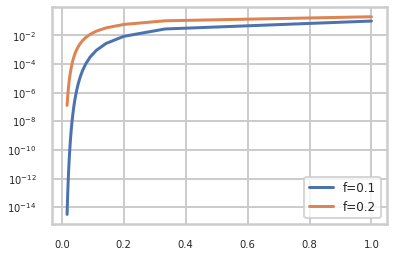

In [25]:
plt.semilogy(res[0,:], res[1,:], label='f=0.1')
plt.semilogy(res02[0,:], res02[1,:], label='f=0.2')
plt.legend()
plt.show()

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

#### Bonus: Hamming code

Le message entrant est encodé en lui ajoutant des bits de parité.
On va traiter le cas d'un message *source* de $4$ bits : $s_1 s_2 s_3 s_4$, le message *transmis* fait 7 bits. Les 4 premiers bits correspondent au message $\vec{s}$, les trois suivants à la parité de 

  * $t5 = s_1 + s_2 + s_3 \;\; {\rm mod} \; 2$
  * $t6 = s_2 + s_3 + s_4 \;\; {\rm mod} \; 2$
  * $t7 = s_3 + s_4 + s_1 \;\; {\rm mod} \; 2$
  
Donc, le message à transmettre peut se transmettre à l'aide de l'opération matricielle suivante

$$
  \vec{t} = G \vec{s}\; {\rm mod} \; 2
$$

avec 

$$
  G = \left[ \begin{array}{cccc}
      1 & 0 & 0 & 0 \\
      0 & 1 & 0 & 0 \\
      0 & 0 & 1 & 0 \\
      0 & 0 & 0 & 1 \\
      1 & 1 & 1 & 0 \\
      0 & 1 & 1 & 1 \\
      1 & 0 & 1 & 1
    \end{array}
    \right]
$$

  1. Vérifier que l'opération matricielle donne bien le résultat voulu
  2. Implémenter la fonction encodant un message, vous ferez attention de rajouter des bits à la fin du message pour obtenir un multiple de 4

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

Vérifier que l'opération matricielle donne bien le résultat voulu

In [26]:
# TODO

In [ ]:
def encode_Hamming(message):
    # TODO
    return None

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [27]:
G = np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,1,0],
              [0,0,0,1],
              [1,1,1,0],
              [0,1,1,1],
              [1,0,1,1]])

entry = np.array([0,1,0,0])
print(entry)
print(np.matmul(entry, G.T) % 2)

[0 1 0 0]
[0 1 0 0 1 1 0]


In [28]:
def encode_Hamming(message):
    return np.matmul(message, G.T) % 2


<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

Afin de décoder le message, il faut regarder ce qu'il se passe lorsque le message ne respecte pas la règle de parité. Il va falloir regarder tous le cas possibles. Examinons un cas particulier, votre travail consistera à regarder les autres cas.

On reçois donc un message $\vec{r} = r_1 r_2 r_3 r_4 r_5 r_6 r_7$. Ce message pour être correct doit vérifier les règles de parité enoncés au préalable. Notons $z_1$ la variable valant $0$ si la partié liée à $r_5$ est vérifiée, et $1$ sinon (on aura respectivement $z_2$ et $z_3$).

Regardons le cas où $z_1=1$, c'est à dire que l'égalité suivante n'est plus vérifiée

$$
  r_5 = r_1 + r_2 + r_3 \;\; {\rm mod} \; 2
$$

L'évènement le plus probable est qu'un bit parmi ceux reçu a été changé (le cas où plus d'un bit a été changé est moins probable). Il faut donc chercher parmi tous les bits $\vec{r}$ celui qui permet de satisfaire les équations de parité de nouveau.
L'unique solution est de considérer que c'est le bit $r_5$ qui a été changé, tout autre choix induit une erreur sur une autre des équations de parité.



<b>
    <span style="color:orange">
        Question
    </span> 
</b>

Vous compléterez à l'aide du tableau suivant tous les cas possibles

|$z_1 z_2 z_3$ | 000 | 001 | 010 | 011 | 100 | 101 | 110 | 111 |
|--------------|-----|-----|-----|-----|-----|-----|-----|-----|
|  Bit pb      | ... | ... | ... | ... | $r_5$ | ... | ... | ... |

Rappel :
$$ r_5 = r_1 + r_2 + r_3 \;\; {\rm mod} \; 2 $$
$$ r_6 = r_2 + r_3 + r_4 \;\; {\rm mod} \; 2 $$
$$ r_7 = r_3 + r_4 + r_1 \;\; {\rm mod} \; 2 $$


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

Vous compléterez à l'aide du tableau suivant tous les cas possibles

|$z_1 z_2 z_3$ | 000 | 001 | 010 | 011 | 100 | 101 | 110 | 111 |
|--------------|-----|-----|-----|-----|-----|-----|-----|-----|
|  Bit pb      | aucune | $r_7$ | $r_6$ | $r_4$ | $r_5$ | $r_1$ | $r_2$ | $r_3$ |


Une fois le tableau complété, écrire une fonction permettant de décoder un message


<b>
    <span style="color:orange">
        Question
    </span> 
</b>


Une fois le tableau complété, écrire une fonction permettant de décoder un message


In [29]:
def decode_Hamming(r, G=G):
    # TODO
    return r

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [30]:
def error_Hamming(r, G=G):
    r_parity = r[-3:]
    r_parity_check = encode_Hamming(r[:4])[-3:]
    error_z = 1 - (r_parity == r_parity_check)
    return error_z

In [31]:
def decode_Hamming(r, G=G):
    z = error_Hamming(r, G)
    r = np.array(r)
    if (z == np.array([0,0,0])).all():
        pass
    elif (z == np.array([0,0,1])).all():
        r[6] = 1-r[6]
    elif (z == np.array([0,1,0])).all():
        r[5] = 1-r[5]
    elif (z == np.array([0,1,1])).all():
        r[3] = 1-r[3]
    elif (z == np.array([1,0,0])).all():
        r[4] = 1-r[4]
    elif (z == np.array([1,0,1])).all():
        r[0] = 1-r[0]
    elif (z == np.array([1,1,0])).all():
        r[1] = 1-r[1]
    else: # z == np.array([1,1,1])
        r[2] = 1-r[2]
    return r[:4]
    

In [32]:
s = np.array([0,1,0,0])
r = encode_Hamming(s)
r[4] = 1-r[4]
message = decode_Hamming(r)
print(message)

[0 1 0 0]


<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

Cette version du code est bien évidement très très sous optimal.
Mais elle correspond au tableau demandé précédement.

TODO ? Faire une version 2 de ce code.
En pratique on code ce genre de chose en C, pas en Python.

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

Version 2 :

In [33]:
def decode_Hamming(r):
    # TODO
    pass

In [34]:
%load_ext Cython

Version Cython :

In [35]:
%%cython

def decode_Hamming(r):
    pass


<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

In [36]:
N_xp =  20_000
transmition_error = 0
error_count = 0
for i in range(N_xp):
    source = np.random.randint(0, 2, size=4)
    encoded = encode_Hamming(source)
    tt = Transmit(encoded, f=0.1)
    decoded = decode_Hamming(tt)

    if (source != decoded).any():
        error_count += 1
    if (source != tt[:4]).any():
        transmition_error += 1
print(error_count, 'vs', transmition_error, 'over', N_xp, 'runs')
print('measured error rate =', error_count/N_xp)
print('no code error rate =', transmition_error/N_xp)


20000 vs 6946 over 20000 runs
measured error rate = 1.0
no code error rate = 0.3473
